In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import random
import pickle
import pandas as pd
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Getting path of folders and their images
path_to_images = "C:\Desktop\major\Dataset"

img_folders = []
for entry in os.scandir(path_to_images):
    if entry.is_dir():
        img_folders.append(entry.path)
img_folders

['C:\\Desktop\\major\\Dataset\\Mild_Demented',
 'C:\\Desktop\\major\\Dataset\\Moderate_Demented',
 'C:\\Desktop\\major\\Dataset\\Non_Demented',
 'C:\\Desktop\\major\\Dataset\\Very_Mild_Demented']

In [3]:
# Creating a dictionary of images and their labels from each folder path

img_dict = {}
for folder in img_folders:
    img_dict[folder] = []
    for entry in os.scandir(folder):
        if entry.is_file():
            img_dict[folder].append(entry.path)
img_dict

{'C:\\Desktop\\major\\Dataset\\Mild_Demented': ['C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_10.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_100.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_101.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_102.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_103.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_104.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_105.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_106.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_107.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_108.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_109.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_11.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_110.jpg',
  'C:\\Desktop\\major\\Dataset\\Mild_Demented\\mild_111.jpg',
  'C:\\Desktop\\major\\Dataset

In [4]:
# Creating a dataframe of images and their labels

img_df = pd.DataFrame(columns=["image", "label"])
for folder in img_dict:
    for img in img_dict[folder]:
        img_df = pd.concat([img_df, pd.DataFrame([[img, folder.split("\\")[-1]]], columns=["image","label"])])
img_df

,image,label
0,C:\Desktop\major\Dataset\Mild_Demented\mild.jpg,Mild_Demented
0,C:\Desktop\major\Dataset\Mild_Demented\mild_10...,Mild_Demented
0,C:\Desktop\major\Dataset\Mild_Demented\mild_10...,Mild_Demented
0,C:\Desktop\major\Dataset\Mild_Demented\mild_10...,Mild_Demented
0,C:\Desktop\major\Dataset\Mild_Demented\mild_10...,Mild_Demented
...,...,...
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented


In [5]:
# Shuffling the dataframe

img_df = shuffle(img_df)
img_df

,image,label
0,C:\Desktop\major\Dataset\Non_Demented\non_168.jpg,Non_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_2233...,Non_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
...,...,...
0,C:\Desktop\major\Dataset\Non_Demented\non_1811...,Non_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_2438...,Non_Demented
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,Very_Mild_Demented
0,C:\Desktop\major\Dataset\Non_Demented\non_663.jpg,Non_Demented


In [6]:
#Encoding the labels

encode_map = {"Non_Demented" : 0, "Very_Mild_Demented" : 1, "Mild_Demented" : 2, "Moderate_Demented" : 3}
img_df["label"] = img_df["label"].map(encode_map)
img_df

,image,label
0,C:\Desktop\major\Dataset\Non_Demented\non_168.jpg,0
0,C:\Desktop\major\Dataset\Non_Demented\non_2233...,0
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,1
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,1
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,1
...,...,...
0,C:\Desktop\major\Dataset\Non_Demented\non_1811...,0
0,C:\Desktop\major\Dataset\Non_Demented\non_2438...,0
0,C:\Desktop\major\Dataset\Very_Mild_Demented\ve...,1
0,C:\Desktop\major\Dataset\Non_Demented\non_663.jpg,0


In [7]:
# Creating X and y by reading images and their labels

X = []
y = []

for img_path, label in zip(img_df["image"].values, img_df["label"].values):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))
    X.append(img)
    y.append(label)
X = np.array(X)
y = np.array(y)

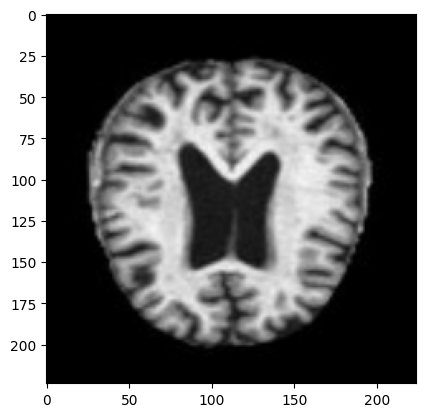

In [8]:
plt.imshow(X[0])

In [9]:
X.shape, y.shape

((6399, 224, 224, 3), (6399,))

In [10]:
# Splitting the data into train, validation and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

In [11]:
# Load pre-trained VGG19 model
base_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


In [12]:
# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False



In [13]:
# Build your own model on top of VGG19
model = tf.keras.models.Sequential()
model.add(base_model)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [15]:
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1, shuffle=True)


Epoch 1/25


87/87 [==============================] - 351s 4s/step - loss: 7.0460 - accuracy: 0.4962 - val_loss: -2.3711 - val_accuracy: 0.5974
Epoch 2/25
87/87 [==============================] - 343s 4s/step - loss: -2.8728 - accuracy: 0.5425 - val_loss: -6.4030 - val_accuracy: 0.5000
Epoch 3/25
87/87 [==============================] - 342s 4s/step - loss: -11.6180 - accuracy: 0.5447 - val_loss: -21.9098 - val_accuracy: 0.5974
Epoch 4/25
87/87 [==============================] - 344s 4s/step - loss: -30.9089 - accuracy: 0.5603 - val_loss: -42.0797 - val_accuracy: 0.6136
Epoch 5/25
87/87 [==============================] - 350s 4s/step - loss: -72.7870 - accuracy: 0.5621 - val_loss: -95.9757 - val_accuracy: 0.5909
Epoch 6/25
87/87 [==============================] - 328s 4s/step - loss: -143.1356 - accuracy: 0.5816 - val_loss: -160.2986 - val_accuracy: 0.6071
Epoch 7/25
87/87 [==============================] - 345s 4s/step - loss: -248.1101 - accuracy: 0.5635 - val_loss: -262.0946 - val_a

In [16]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)


80/80 [==============================] - 265s 3s/step


In [17]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [18]:
# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")
conf_matrix = confusion_matrix(y_test, y_pred)


c:\Users\EPSITA MUKHERJEE\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.568359375
Precision: 0.5575801423063085
Recall: 0.568359375
F1 Score: 0.5326804075413897
Confusion Matrix:
[[726 554   0   0]
 [166 729   0   0]
 [  6 353   0   0]
 [  0  26   0   0]]
